# **Problem:**
Use the `credit.csv` dataset to build **classification model** using KNN. The target variable is `default` which is a binary label to indicate of the loan is default (yes, no). Use all other variables for your feature set. 

 **Read `credit.csv` into a dataframe `credit_df`. Display the first 5 rows**

`hint`: Handel the missing value character '?' as na value.*

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_df = pd.read_csv ('product_purchased.csv')
credit_df.head(5)

,Age,Gender,Occupation,Employment Status,Employement Type,Salary,Purchased
0,34,Male,Salaried,Yes,Permanent,72000,No
1,42,Female,Business,Yes,Temporary,48000,Yes
2,?,Male,Business,No,Temporary,54000,No
3,38,Male,Business,No,Permanent,61000,No
4,32,Male,Salaried,?,Permanent,?,Yes


#### **Print the number of rows and columns in the dataframe**

In [3]:
rows = len(credit_df.axes[0]) 
cols = len(credit_df.axes[1])
print("Number of Rows: " + str(rows)) 
print("Number of Columns: " + str(cols))

Number of Rows: 100
Number of Columns: 7


#### **Print the total number of rows that have missing values**

In [4]:
credit_df=credit_df.replace('?', np.NaN)
nan_values =  sum(credit_df.isnull().values.ravel())
credit_df = credit_df.fillna(credit_df.mean())
print("Total number of rows that have missing values: " + str(nan_values)) 

Total number of rows that have missing values: 86


#### **Determine categorical and numerical features and assign each into `numerical_features` and `categorical_features`**

In [5]:
categorical_features = credit_df.drop(['Salary', 'Age'], axis=1)
numerical_features = credit_df[['Salary','Age']]
categorical_features.head(5)
numerical_features.head(5)

,Salary,Age
0,72000,34
1,48000,42
2,54000,NaN
3,61000,38
4,NaN,32


#### **Create the preprocessing pipelines for both numeric and categorical data that does imputation, scaling and ONeHotEncoder to the appropriate columns.**
Use mean strategy for numerical imputation and most frequent for categorical imputation
Use MinMaxScaler for data scaling.
Enable drop first method in the OneHotEncoder constructor

In [6]:

t1 = [('num', SimpleImputer(strategy='mean'),[0,5]), ('cat', SimpleImputer(strategy='most_frequent'),[1,2,3,4,6])]

t = [('cat1',OneHotEncoder() ,[1,2,3,4,5])]


#### **Implement ColumnTransformer for both numerical and categorical columns and assigned to a variable called `preprocessor`**

In [7]:

ct = ColumnTransformer(transformers=t1)
ct1 = ColumnTransformer(transformers=t)

#### **Fit and transform the original data frame `credit_df` and assign the final output to `transformed_data_df`** 
`hints:` 
- *use the preprocessor object created in the previous to fit and transform on the credit_df.*
- *use extract_feature_names method to get the feature names in order to create the final transformed_data_df*

In [8]:
transformed_data_df = ct.fit_transform(credit_df)
columns = ['Age', 'Salary','Occupation','Employment Status','Employement Type' ,'Gender', 'Purchased']
transformed_data_df = pd.DataFrame(data = transformed_data_df , columns=columns)

#### **Partition the dataset into `X` feature matrix and `y` target variable.**

In [9]:
X = transformed_data_df.drop(['Salary'], axis=1)
y = transformed_data_df[['Salary']]
y=y.astype('int')
X

,Age,Occupation,Employment Status,Employement Type,Gender,Purchased
0,34,Male,Salaried,Yes,Permanent,No
1,42,Female,Business,Yes,Temporary,Yes
2,35.0714,Male,Business,No,Temporary,No
3,38,Male,Business,No,Permanent,No
4,32,Male,Salaried,Yes,Permanent,Yes
...,...,...,...,...,...,...
95,32,Female,Business,Yes,Temporary,Yes
96,35.0714,Female,Salaried,Yes,Temporary,No
97,32,Male,Salaried,Yes,Permanent,Yes
98,29,Male,Business,No,Temporary,No


#### **Split the data into training and testing: X_train, X_test, y_train, y_test**

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

#### **Build a k-nearest neighbors (KNN) classifier and train the model using the `fit` method.**

In [11]:

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #model = make_pipeline(ct1, KNeighborsClassifier(n_neighbors=k))
    pipeline = Pipeline(steps=[('t', ct1), ('m', knn)])
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

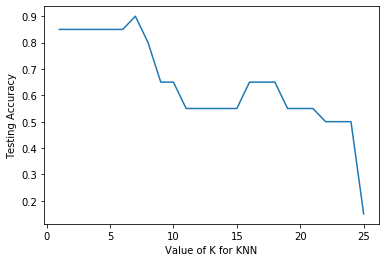

In [12]:


plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
pipeline = Pipeline(steps=[('t', ct1), ('m', knn)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('cat1', OneHotEncoder(),
                                                  [1, 2, 3, 4, 5])])),
                ('m', KNeighborsClassifier(n_neighbors=7))])

#### **Compute and display the percent accuracy score**

In [14]:
print("KNN Accuracy score: %f" % pipeline.score(X_test, y_test))

KNN Accuracy score: 0.900000


#### **Create a dataframe to hold both the Actual and Predicted labels and display the first 20 rows**

In [15]:
predicted_salaries = pipeline.predict(X)

transformed_data_df['predicted_salaries'] = predicted_salaries
transformed_data_df.head(20)

,Age,Salary,Occupation,Employment Status,Employement Type,Gender,Purchased,predicted_salaries
0,34,72000,Male,Salaried,Yes,Permanent,No,72000
1,42,48000,Female,Business,Yes,Temporary,Yes,58000
2,35.0714,54000,Male,Business,No,Temporary,No,61625
3,38,61000,Male,Business,No,Permanent,No,61000
4,32,61625,Male,Salaried,Yes,Permanent,Yes,61625
5,31,58000,Female,Business,Yes,Temporary,Yes,58000
6,35.0714,52000,Female,Salaried,Yes,Temporary,No,52000
7,22,79000,Female,Salaried,Yes,Self Employed,Yes,79000
8,38,61625,Male,Business,No,Temporary,No,61625
9,49,67000,Male,Business,Yes,Self Employed,Yes,67000
